# Biclustering

Ejemplo de Biclustering en sklearn

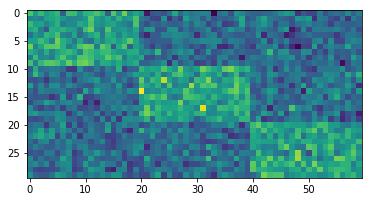

In [60]:
import matplotlib.pyplot as plt
import numpy as np

n = 10
m = 20
std = 0.5

def black_square():
    return np.ones([n, m]) + std * np.random.randn(n, m)

def white_square():
    return std * np.random.randn(n, m)

C = np.vstack([
    np.hstack([black_square(), white_square(), white_square()]),
    np.hstack([white_square(), black_square(), white_square()]),
    np.hstack([white_square(), white_square(), black_square()]),
])

plt.imshow(C)

Ahora, hagamos un shuffle de columnas

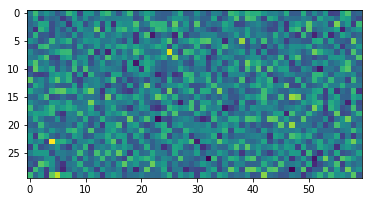

In [61]:
col_shuffle = np.random.permutation(C.T).T
# Ahora shuffle de filas
C_shuffle = np.random.permutation(col_shuffle)

plt.imshow(C_shuffle)

Hagamos biclustering

In [62]:
from sklearn.cluster.bicluster import SpectralCoclustering

cocluster = SpectralCoclustering(3)
cocluster.fit(C_shuffle)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=3,
           n_init=10, n_jobs=None, n_svd_vecs=None, random_state=None,
           svd_method='randomized')

In [63]:
cocluster.row_labels_

array([1, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 1, 2, 1, 0], dtype=int32)

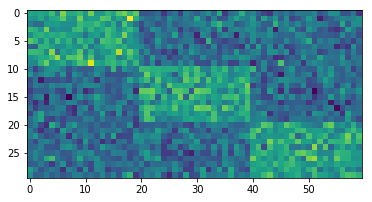

In [64]:
row_order = np.argsort(cocluster.row_labels_)[:, np.newaxis]
col_order = np.argsort(cocluster.column_labels_)


plt.imshow(C_shuffle[row_order, col_order])

Son iguales?

In [58]:
np.allclose(C_shuffle[row_order, col_order], C)

False

No! No es una solución exacta